In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('.\\auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

In [3]:
data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
##checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<AxesSubplot:xlabel='Horsepower'>

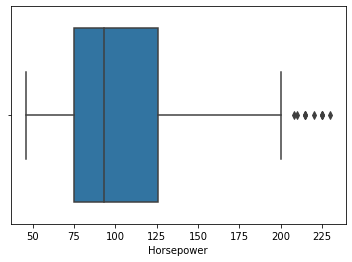

In [6]:
##summary statistics of quantitative variables
data.describe()

##looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])

In [7]:
##imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
##category distribution
#data["Cylinders"].value_counts() / len(data)
data["Cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [9]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [10]:
# stratified sampling and split of data into test and training sets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    

In [11]:
strat_train_set.info()
strat_test_set.info()
##converting integer classes to countries in Origin just for learning n add some 
#strat_train_set['Origin'].replace({1: "India", 2: "USA", 3:"Germany"}, inplace=True)
##strat_train_set['Origin'] = strat_train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Ger'})
#strat_train_set.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           318 non-null    float64
 1   Cylinders     318 non-null    int64  
 2   Displacement  318 non-null    float64
 3   Horsepower    318 non-null    float64
 4   Weight        318 non-null    float64
 5   Acceleration  318 non-null    float64
 6   Model Year    318 non-null    int64  
 7   Origin        318 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 22.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 128 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           80 non-null     float64
 1   Cylinders     80 non-null     int64  
 2   Displacement  80 non-null     float64
 3   Horsepower    80 non-null     float64
 4   Weight        80 non-null     float64
 5   Ac

In [12]:
strat_test_set.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [13]:
strat_train_set.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [14]:
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [15]:
##checking for cylinder category distribution in training set

strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [16]:
##checking for cylinder category distribution in test set
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

### You can compare the above results with the output of train_test_split() to find out which one produces better splits.

In [17]:
##converting integer classes to countries in Origin 
strat_train_set['Origin'].replace({1: "India", 2: "USA", 3:"Germany"}, inplace=True)

In [18]:
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany
151,31.0,4,79.0,67.0,2000.0,16.0,74,USA
388,26.0,4,156.0,92.0,2585.0,14.5,82,India
48,18.0,6,250.0,88.0,3139.0,14.5,71,India
114,26.0,4,98.0,90.0,2265.0,15.5,73,USA


In [19]:
strat_test_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
100,18.0,6,250.0,88.0,3021.0,16.5,73,1
330,40.9,4,85.0,93.5,1835.0,17.3,80,2
57,24.0,4,113.0,95.0,2278.0,15.5,72,3
160,17.0,6,231.0,110.0,3907.0,21.0,75,1


### We’ll have to preprocess this categorical column by one-hot encoding these values:

In [22]:
##one hot encoding
strat_train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


#### Testing for new variables — Analyze the correlation of each variable with the target variable

### Testing for new variables — Analyze the correlation of each variable with the target variable

In [23]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)


MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [25]:
##handling missing values
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy="median")
#imputer.fit(num_data)

NameError: name 'num_data' is not defined

### Attribute Addition — Adding custom transformation

##### acc_on_power — Acceleration divided by Horsepower
#### acc_on_cyl — Acceleration divided by the number of Cylinders

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]


NameError: name 'data_tr' is not defined